In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
%cd /content/gdrive/MyDrive/
%pwd #print working directory

Mounted at /content/gdrive
/content/gdrive/MyDrive


'/content/gdrive/MyDrive'

In [ ]:
import os
if not os.path.isdir("TheCodingBug1"): os.makedirs("TheCodingBug1")
%cd TheCodingBug1

/content/gdrive/MyDrive/TheCodingBug1


In [ ]:
#bir sonraki detection için çalıştırma. İlk kurulum için gerekli.
!git clone https://github.com/WongKinYiu/yolov7.git

In [ ]:
%cd yolov7

/content/gdrive/MyDrive/TheCodingBug1/yolov7


In [ ]:
#bir sonraki detection için çalıştırma. İlk kurulum için gerekli.
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-tiny.pt

In [ ]:
!python detect.py --weights yolov7.pt --conf 0.25 --img-size 640 --source inference/images/image3.jpg

In [ ]:
!python detect.py --weights yolov7.pt --conf 0.5 --img-size 640 --source inference/images/video.mp4

In [ ]:
!python train.py --weights last.pt --data "./data/custom.yaml" --workers 4 --batch-size 4 --img 416 --cfg cfg/training/yolov7.yaml --name yolov7

2023-12-14 18:30:28.513284: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-14 18:30:28.513351: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-14 18:30:28.513393: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-14 18:30:28.521466: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-14 18:30:29.539984: W tensorflow/compiler/

In [ ]:
!python test.py --weights runs/train/yolov73/weights/last.pt --task test --data "./data/custom.yaml"

Namespace(weights=['runs/train/yolov73/weights/last.pt'], data='./data/custom.yaml', batch_size=32, img_size=640, conf_thres=0.001, iou_thres=0.65, task='test', device='', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='exp', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.1.0+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: i

In [ ]:
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
!python detect.py --save-txt --conf 0.5 --weights runs/train/yolov73/weights/last.pt --source "./img/505.jpg" --exist-ok

Namespace(weights=['runs/train/yolov73/weights/last.pt'], source='./img/505.jpg', img_size=640, conf_thres=0.5, iou_thres=0.45, device='', view_img=False, save_txt=True, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=True, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.1.0+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
1 OpticDisc, Done. (2

.jpg
/content/gdrive/MyDrive/TheCodingBug1/yolov7/img/228.jpg
228.jpg
2048 x 2484
python3: can't open file '/content/detect.py': [Errno 2] No such file or directory
0 0.44525 0.439941 0.176328 0.241211

<class 'str'>


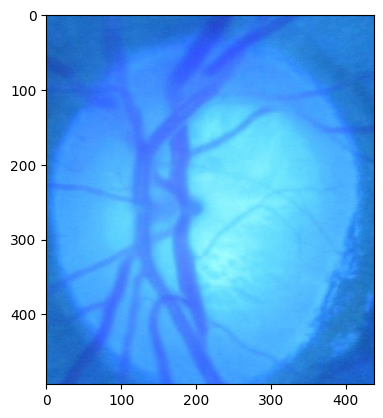

0 0.44525 0.439941 0.176328 0.241211

<class 'str'>


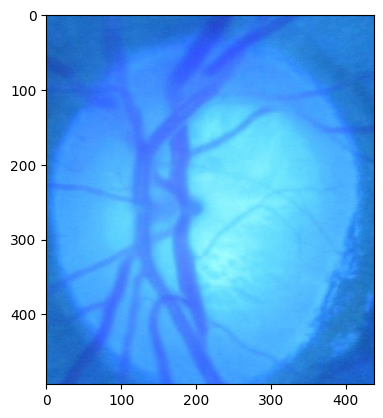

0 0.44525 0.439941 0.176328 0.241211

<class 'str'>


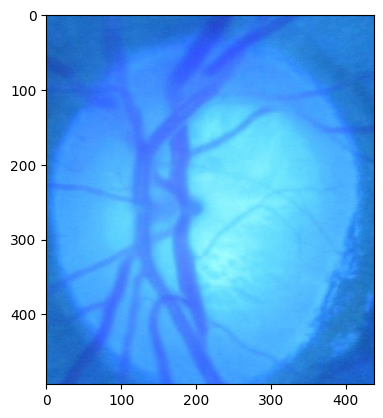

0 0.44525 0.439941 0.176328 0.241211

<class 'str'>


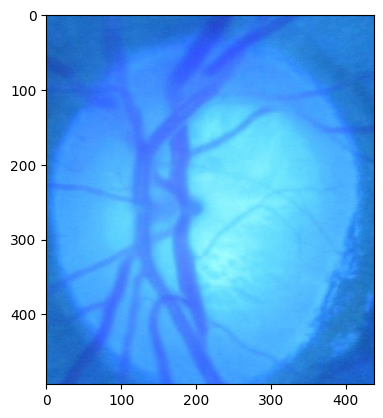

.jpg
/content/gdrive/MyDrive/TheCodingBug1/yolov7/img/439.jpg
439.jpg
2048 x 2444
python3: can't open file '/content/detect.py': [Errno 2] No such file or directory
0 0.362111 0.502686 0.173486 0.210449

<class 'str'>


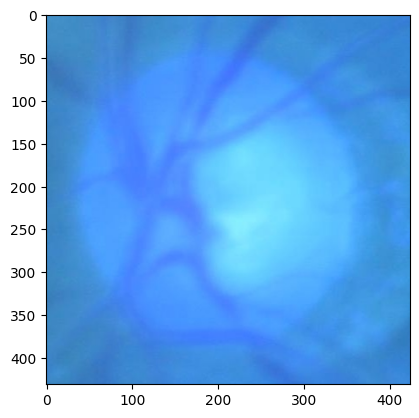

0 0.362111 0.502686 0.173486 0.210449

<class 'str'>


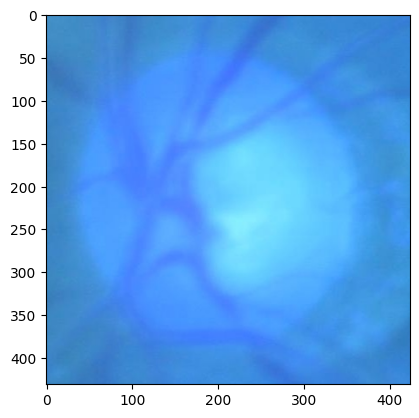

.jpg
/content/gdrive/MyDrive/TheCodingBug1/yolov7/img/103.jpg
103.jpg
2048 x 2525
python3: can't open file '/content/detect.py': [Errno 2] No such file or directory
0 0.584356 0.490723 0.2 0.269531

<class 'str'>


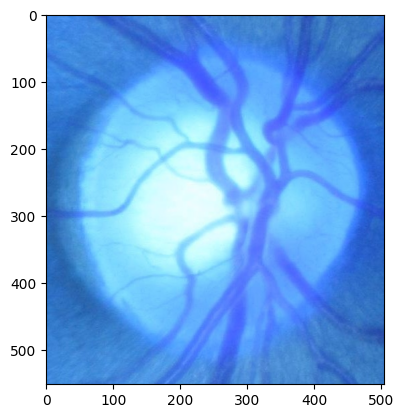

.jpg
/content/gdrive/MyDrive/TheCodingBug1/yolov7/img/007.jpg
007.jpg
2048 x 2466
python3: can't open file '/content/detect.py': [Errno 2] No such file or directory
0 0.371655 0.481689 0.165856 0.223145

<class 'str'>


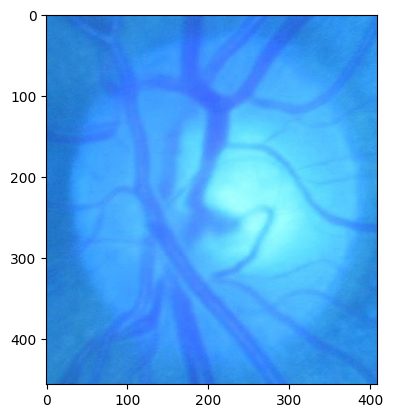

.jpg
/content/gdrive/MyDrive/TheCodingBug1/yolov7/img/098.jpg
098.jpg
2048 x 2435
python3: can't open file '/content/detect.py': [Errno 2] No such file or directory
0 0.683162 0.457031 0.168789 0.233398

<class 'str'>


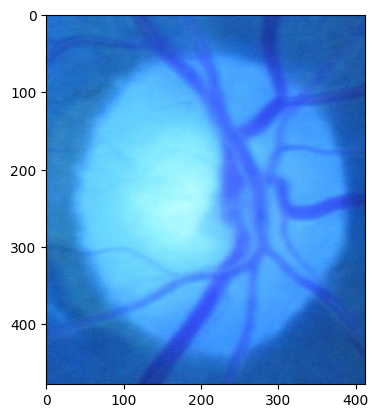

.jpg
/content/gdrive/MyDrive/TheCodingBug1/yolov7/img/010.jpg
010.jpg
2048 x 2511
python3: can't open file '/content/detect.py': [Errno 2] No such file or directory
0 0.639188 0.436035 0.160096 0.21875

<class 'str'>


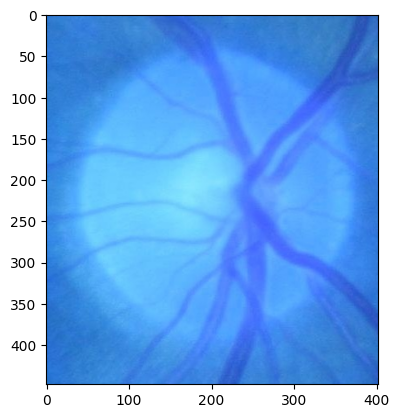

.jpg
/content/gdrive/MyDrive/TheCodingBug1/yolov7/img/348.jpg
348.jpg
2048 x 2462
python3: can't open file '/content/detect.py': [Errno 2] No such file or directory
0 0.660845 0.469727 0.168968 0.208984

<class 'str'>


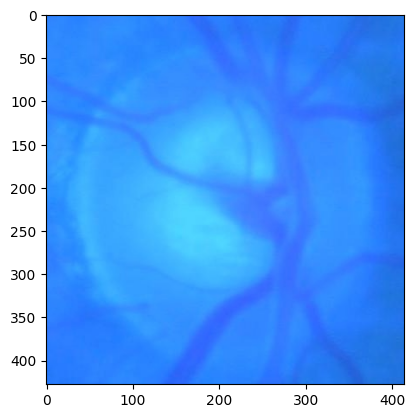

.jpg
/content/gdrive/MyDrive/TheCodingBug1/yolov7/img/084.jpg
084.jpg
2048 x 2430
python3: can't open file '/content/detect.py': [Errno 2] No such file or directory


FileNotFoundError: ignored

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
path=os.path.join("/content/gdrive/MyDrive/TheCodingBug1/yolov7/runs/detect/exp/labels/")
image_path=""
path1 = os.path.join("/content/gdrive/MyDrive/TheCodingBug1/yolov7/img")
for filename in os.listdir(path1):
  if (os.path.splitext(filename)[1]!=".txt"):
    image_path = os.path.join(path1, filename)
    print(os.path.splitext(filename)[1])
    print(image_path)
    print(filename)
    img = cv2.imread(image_path)
    height = img.shape[0]
    width = img.shape[1]
    print(height,"x",width)
    #--exist-ok sonuçlar tek klasöre runs/detect/exp klasörüne kopyalanır
    #--source "$image_path" detect yapılacak resimleri bulunduğu klasör
    #--save-txt elde edilen bölge koordinatları runs/detect/exp/labels klasörüne kopyalanır.
    !python detect.py --save-txt --conf 0.4 --weights runs/train/yolov73/weights/last.pt --source "$image_path" --exist-ok
    import re
    resultpath=path+os.path.splitext(filename)[0]+".txt"
    myfile=open(resultpath,'r')
    lines=myfile.readlines()
    for line in lines:
      print(line)
      print(type(line))
      Cord=line.split(' ')
      x_min=float(Cord[1])-(float(Cord[3])/2)  #merkez nokta x-width/2
      x_max=float(Cord[1])+(float(Cord[3])/2)  #merkez nokta x+width/2
      y_min=float(Cord[2])-(float(Cord[4])/2)  #merkez nokta y-heigth/2
      y_max=float(Cord[2])+(float(Cord[4])/2) #merkez nokta y+2heigth/2
      crop_img = img[int(y_min*height):int(y_max*height),int(x_min*width):int(x_max*width)]
      cv2.imwrite(os.path.join("/content/gdrive/MyDrive/TheCodingBug1/yolov7/croppedimage/",filename),crop_img)
      plt.imshow(crop_img)
      plt.show()
      #imShow('predictions.jpg')